<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/Reto2_Muestreo_de_VA_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muestreo de Variables Aleatorias y Confiabilidad**

*David Ospina Muñoz*

Una empresa del sector asegurador ha creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo el proceso de muestreo de la distribución agregada de pérdidas mediante la utilización del método de Montecarlo, utilizando para ello diferentes niveles de confiabilidad (99%,99,9%,99,99%).

Para el análisis de resultados, analizar el cambio que pueden experimentar la estructura de las distribuciones (hacer gráfica en Python) de acuerdo con el cambio en el coeficiente de Asimetría, Kurtosis, y Tipo de Distribución. Hacer el análisis respectivo mediante un párrafo de análisis no menor a las 150 palabras.


0. Se procede con la carga de las librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Para conectar directamente con el drive
from google.colab import drive
drive.mount('/content/drive')

#La librería para los números aleatorios
import random as rnd

Mounted at /content/drive


1. Se procede con la carga del archivo de trabajo

**Descripción de las Variables**

Esta base de datos de eventos de pérdida, posee dos variables:
1. Frecuencia: Indica el número de eventos de pérdida por período de tiempo (semana, día, mes).

2. Severidad: Indica el costo de cada evento de pérdida.



Las pérdidas esperadas son:
 1.469187040102234
Las pérdidas no esperadas son:
 0.734593520051117
El valor de la póliza de aseguramiento:
 0.0


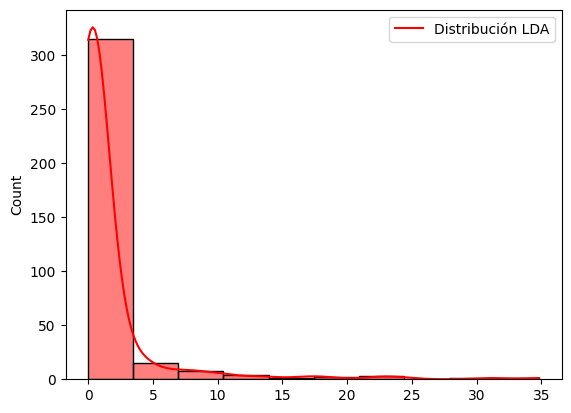

In [ ]:
nxl='/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/6.3 AdmonEjecProcesos.xlsx'
XDB=pd.read_excel(nxl, sheet_name=1)
XDB.head(100)

Xf=XDB.iloc[:,1]
Xs=XDB.iloc[:,2]
LDA=Xf*Xs

u=np.mean(LDA) #Límite superior de las pérdidas esperadas (Zona 1)
OpVar=np.percentile(LDA, 0.999) #Valor Asegurado OpVar (Zona 3)
PNE=(u+OpVar)/2 #Pérdidas esperadas (Zona 2)

print("Las pérdidas esperadas son:\n", u)
print("Las pérdidas no esperadas son:\n", PNE)
print("El valor de la póliza de aseguramiento:\n", OpVar)

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
plt.legend(['Distribución LDA'])
plt.show()


In [ ]:
counts,bin_edges=np.histogram(LDA, bins=10)

LI=bin_edges[:-1]      #Límites inferiores
LS=bin_edges[1:]       #Límites superiores
mc=(LI+LS)/2           #Marcas de clase

pdf=counts/sum(counts) #Nos entrega la frecuencia relativa
                       #Porcentaje de datos por intervalos

cdf=np.cumsum(pdf)     #Construimos la ruleta
                       #El acumulado de las probabilidades

df=pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns=['LI','LS','mc','pdf','cdf']
df.head(10)

,LI,LS,mc,pdf,cdf
0,0.000000,3.482216,1.741108,0.900000,0.900000
1,3.482216,6.964431,5.223323,0.042857,0.942857
2,6.964431,10.446647,8.705539,0.022857,0.965714
3,10.446647,13.928862,12.187755,0.011429,0.977143
4,13.928862,17.411078,15.669970,0.002857,0.980000
5,17.411078,20.893294,19.152186,0.005714,0.985714
6,20.893294,24.375509,22.634402,0.008571,0.994286
7,24.375509,27.857725,26.116617,0.000000,0.994286
8,27.857725,31.339941,29.598833,0.002857,0.997143
9,31.339941,34.822156,33.081048,0.002857,1.000000


iteración 0
El aleatorio es: 0.03574443264597349
La lista de números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [1.61388973]
iteración 1
El aleatorio es: 0.3920871030847012
La lista de números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [3.0662876

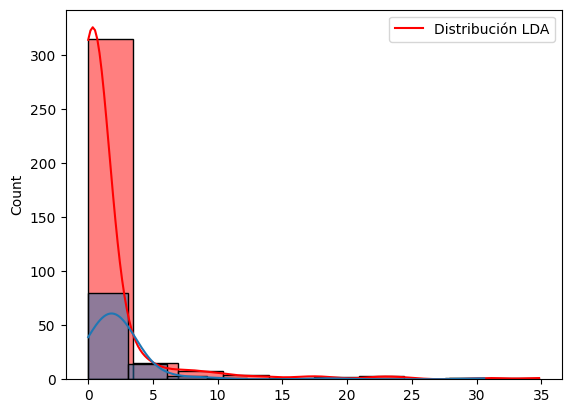

In [ ]:
TI = LS[0]-LI[0] #Tamaño del intervalo

#Confiabilidad del 99% - 100 datos
LDAm100=np.zeros((100,1))

for i in range(100):
  print("iteración", i)
  aleatorio=rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))
  Intervalo=Intervalo=np.array(np.where((aleatorio<cdf)))
  print("El intervalo de trabajo es:", Intervalo[0,0])
  print("Los límites inferiores son:\n", LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n", LI[Intervalo[0,0]])
  LDAm100[i]=LI[Intervalo[0,0]] + TI*aleatorio2
  print("El valor muestreado es:", LDAm100[i])

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
sns.histplot(LDAm100, bins=10, kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[False False False False False False False False  True  True]
El intervalo de trabajo es: 8
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 27.857724953394275
El valor muestreado es: [30.51082062]
iteración 616
El aleatorio es: 0.32281241636391533
La lista de números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [2.01678997]
iteración 617
El aleatorio es: 0.3940966766204923
La lista de números es:
 [0.9        0.94285714 

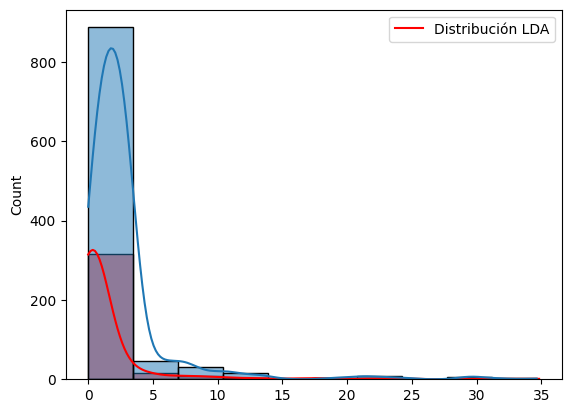

In [ ]:
#Confiabilidad del 99,9% - 1000 datos
LDAm1000=np.zeros((1000,1))

for i in range(1000):
  print("iteración", i)
  aleatorio=rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))
  Intervalo=Intervalo=np.array(np.where((aleatorio<cdf)))
  print("El intervalo de trabajo es:", Intervalo[0,0])
  print("Los límites inferiores son:\n", LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n", LI[Intervalo[0,0]])
  LDAm1000[i]=LI[Intervalo[0,0]] + TI*aleatorio2
  print("El valor muestreado es:", LDAm1000[i])

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
sns.histplot(LDAm1000, bins=10, kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [0.66599028]
iteración 9616
El aleatorio es: 0.39599156453873186
La lista de números es:
 [0.9        0.94285714 0.96571429 0.97714286 0.98       0.98571429
 0.99428571 0.99428571 0.99714286 1.        ]
[ True  True  True  True  True  True  True  True  True  True]
El intervalo de trabajo es: 0
Los límites inferiores son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
El intervalo seleccionado es:
 0.0
El valor muestreado es: [1.56273136]
iteración 9617
El aleatorio es: 0.7941576433250063
La lista de números es:
 [0.9        0.94285714 0.96571429 0.9

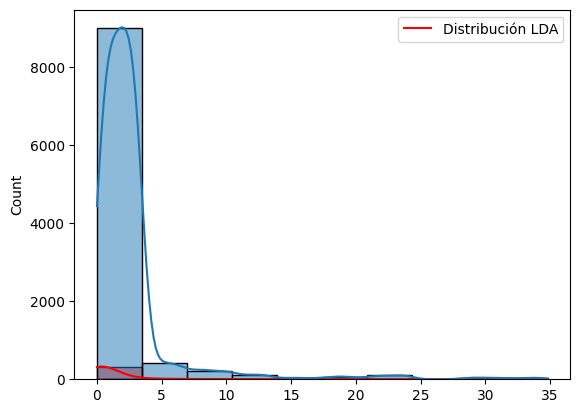

In [ ]:
#Confiabilidad del 99,99% - 10000 datos
LDAm10000=np.zeros((10000,1))

for i in range(10000):
  print("iteración", i)
  aleatorio=rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))
  Intervalo=Intervalo=np.array(np.where((aleatorio<cdf)))
  print("El intervalo de trabajo es:", Intervalo[0,0])
  print("Los límites inferiores son:\n", LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n", LI[Intervalo[0,0]])
  LDAm10000[i]=LI[Intervalo[0,0]] + TI*aleatorio2
  print("El valor muestreado es:", LDAm10000[i])

plt.figure()
sns.histplot(LDA, bins=10, kde=True, color='red')
sns.histplot(LDAm10000, bins=10, kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

Caracterización de la distribución agregada de pérdidas

In [ ]:
#Para los datos originales
counts,bin_edges=np.histogram(LDA,bins=10)
print(counts)    #Cuantos datos hay por intervalo
print(bin_edges) #Límites de los intervalos

#Para los datos muestreados (n=100)
counts_m100,bin_edges_m100=np.histogram(LDAm100,bins=10)
print(counts_m100)    #Cuantos datos hay por intervalo
print(bin_edges_m100) #Límites de los intervalos

#Para los datos muestreados (n=1000)
counts_m1000,bin_edges_m1000=np.histogram(LDAm1000,bins=10)
print(counts_m1000)    #Cuantos datos hay por intervalo
print(bin_edges_m1000) #Límites de los intervalos

#Para los datos muestreados (n=10000)
counts_m10000,bin_edges_m10000=np.histogram(LDAm10000,bins=10)
print(counts_m10000)    #Cuantos datos hay por intervalo
print(bin_edges_m10000) #Límites de los intervalos

#Los valores centrales - marcas de clase para los datos
mc=(bin_edges[1:]+bin_edges[:-1])/2
mc_100=(bin_edges_m100[1:]+bin_edges_m100[:-1])/2
mc_1000=(bin_edges_m1000[1:]+bin_edges_m1000[:-1])/2
mc_10000=(bin_edges_m10000[1:]+bin_edges_m10000[:-1])/2

#Cuantos datos hay por intervalo
fp=counts/sum(counts)
fp_m100=counts_m100/sum(counts_m100)
fp_m1000=counts_m1000/sum(counts_m1000)
fp_m10000=counts_m10000/sum(counts_m10000)

[315  15   8   4   1   2   3   0   1   1]
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]
[80 14  3  1  0  0  1  0  0  1]
[9.55342866e-04 3.05894283e+00 6.11693032e+00 9.17491780e+00
 1.22329053e+01 1.52908928e+01 1.83488803e+01 2.14068677e+01
 2.44648552e+01 2.75228427e+01 3.05808302e+01]
[887  47  32  15   1   3   7   1   5   2]
[1.70961572e-03 3.46469677e+00 6.92768393e+00 1.03906711e+01
 1.38536582e+01 1.73166454e+01 2.07796325e+01 2.42426197e+01
 2.77056069e+01 3.11685940e+01 3.46315812e+01]
[8999  410  223  110   32   57   97    0   38   34]
[3.07920114e-04 3.47994529e+00 6.95958267e+00 1.04392200e+01
 1.39188574e+01 1.73984948e+01 2.08781322e+01 2.43577695e+01
 2.78374069e+01 3.13170443e+01 3.47966817e+01]


In [ ]:
#Se procede con el cálculo de las medidas de tendencia central: Media, varianza,coeficiente de asimetría, Kurtosis

#Para los datos originales
u=np.sum(np.multiply(mc,fp))
print("La media de los datos originales es:",u)
u_100=np.sum(np.multiply(mc_100,fp_m100))
print("La media de los datos muestreados (n=100) es:",u_100)
u_1000=np.sum(np.multiply(mc_1000,fp_m1000))
print("La media de los datos muestreados (n=1000) es:",u_1000)
u_10000=np.sum(np.multiply(mc_10000,fp_m10000))
print("La media de los datos muestreados (n=10000) es:",u_10000)

La media de los datos originales es: 2.656433058055811
La media de los datos muestreados (n=100) es: 2.6919843311896607
La media de los datos muestreados (n=1000) es: 2.7097655712854456
La media de los datos muestreados (n=10000) es: 2.711293398115088


In [ ]:
#Desviación estándar - varianza #Para los datos originales
std=np.sqrt(np.sum(np.multiply(np.power(mc-u,2),fp)))
print("La desviación estándar de los datos originales es:",std)
std_m100=np.sqrt(np.sum(np.multiply(np.power(mc_100-u_100,2),fp_m100)))
print("La desviación estándar de los datos muestreados (n=100) es:",std_m100)
std_m1000=np.sqrt(np.sum(np.multiply(np.power(mc_1000-u_1000,2),fp_m1000)))
print("La desviación estándar de los datos muestreados (n=1000) es:",std_m1000)
std_m10000=np.sqrt(np.sum(np.multiply(np.power(mc_10000-u_10000,2),fp_m10000)))
print("La desviación estándar de los datos muestreados (n=10000) es:",std_m10000)

La desviación estándar de los datos originales es: 3.6179492178130417
La desviación estándar de los datos muestreados (n=100) es: 3.58659044809482
La desviación estándar de los datos muestreados (n=1000) es: 3.639393560498267
La desviación estándar de los datos muestreados (n=10000) es: 3.8320322212552154


In [ ]:
#Error asociado con la muestra de los datos originales
n = len(LDA)
print("El tamaño de la muestra es:",n)
Z = 2
p = 0.955
#Error asociado con la muestra de los datos muestreados
n_100 = len(LDAm100)
n_1000 = len(LDAm1000)
n_10000 = len(LDAm10000)

El tamaño de la muestra es: 350


In [ ]:
def metricas(mc,u,std,n):
  cas=np.sum(np.multiply(np.power((mc-u)/std,3),fp))
  kur=np.sum(np.multiply(np.power((mc-u)/std,4),fp))
  kur=kur-3
  e = np.sqrt((Z**2 * p * (1-p)) / n)
  LI = u - e
  LS = u + e
  return cas, kur, e, LI, LS


In [ ]:
met=metricas(mc,u,std, n)
cas = met[0]
kur = met[1]
e = met[2]
LI = met[3]
LS = met[4]

met100=metricas(mc_100,u_100,std_m100, n_100)
cas_100 = met100[0]
kur_100 = met100[1]
e_100 = met100[2]
LI_100 = met100[3]
LS_100 = met100[4]

met1000=metricas(mc_1000,u_1000,std_m1000, n_1000)
cas_1000 = met1000[0]
kur_1000 = met1000[1]
e_1000 = met1000[2]
LI_1000 = met1000[3]
LS_1000 = met1000[4]

met10000=metricas(mc_10000,u_10000,std_m10000, n_10000)
cas_10000 = met10000[0]
kur_10000 = met10000[1]
e_10000 = met10000[2]
LI_10000 = met10000[3]
LS_10000 = met10000[4]


In [ ]:
def tipo_distribucion(cas, kur):
  if abs(cas) < 0.5 and abs(kur) < 0.5:
    resultado4 = "Posible distribución Normal"
  elif cas > 0 and kur > 3:
      if kur >= 8:
        resultado4 = "Posible distribución Exponencial"
      elif kur >= 6:
        resultado4 = "Posible distribución Gamma"
      else:
        resultado4 = "Posible distribución Weibull"
  elif cas < 0 and kur < 3:
    resultado4 = "Posible distribución Beta"
  elif kur < 3:
    resultado4 = "Posible distribución Uniforme"
  else:
    resultado4 = "No se pudo identificar la distribución"

  return(resultado4)

In [ ]:
inf1000=tipo_distribucion(cas_1000, kur_1000)
print(inf1000)

inf100=tipo_distribucion(cas_100, kur_100)
print(inf100)

inf10000=tipo_distribucion(cas_10000, kur_10000)
print(inf10000)

inf=tipo_distribucion(np.array(cas), np.array(kur))
print(inf)

Posible distribución Exponencial
Posible distribución Exponencial
Posible distribución Exponencial
Posible distribución Exponencial


In [ ]:
confiabilidad = ["Datos Base","99 %", "99,9 %", "99,99 %"]
nd = [n, n_100, n_1000, n_10000]
error = [e, e_100, e_1000, e_10000]
u = [u, u_100, u_1000, u_10000]
std = [std, std_m100, std_m1000, std_m10000]
cas = [cas, cas_100, cas_1000, cas_10000]
kur = [kur, kur_100, kur_1000, kur_10000]
u_e_k_mas = [LS, LS_100, LS_1000, LS_10000]
u_e_k_menos = [LI, LI_100, LI_1000, LI_10000]
tipo_distribucion = [inf, inf100, inf1000, inf10000]

tabla = pd.DataFrame({
    "Confiabilidad": confiabilidad,
    "ND": nd,
    "Error": error,
    "Media": u,
    "Desviación Estándar": std,
    "Asimetría": cas,
    "Kurtosis": kur,
    "u+ek": u_e_k_mas,
    "u-ek": u_e_k_menos,
    "Tipo Distribución": tipo_distribucion})

In [ ]:
tabla

,Confiabilidad,ND,Error,Media,Desviación Estándar,Asimetría,Kurtosis,u+ek,u-ek,Tipo Distribución
0,Datos Base,350,0.022162,2.656433,3.617949,5.313307,31.735557,2.678595,2.634271,Posible distribución Exponencial
1,99 %,100,0.041461,2.691984,3.586590,3.457448,16.961755,2.733445,2.650524,Posible distribución Exponencial
2,"99,9 %",1000,0.013111,2.709766,3.639394,5.080528,29.808846,2.722877,2.696655,Posible distribución Exponencial
3,"99,99 %",10000,0.004146,2.711293,3.832032,4.422308,24.256188,2.715439,2.707147,Posible distribución Exponencial


In [ ]:
tabla.to_excel('Tabla_Muestreo.xlsx')

## Análisis de resultados



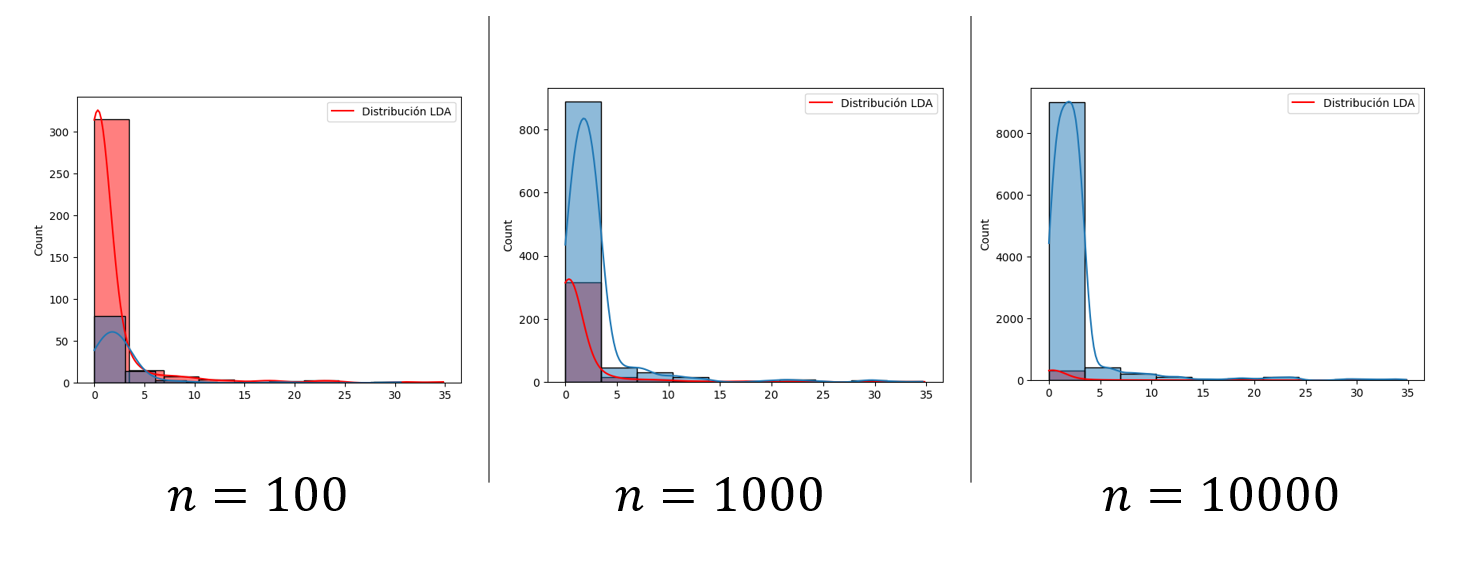

En la base de datos original se tiene un total de 350 registros de eventos de pérdidas asociados con la administración y la ejecución de los procesos de la organización. Los datos presentaron una media de 2.656433, una desviación estándar de 3.617949, un coeficiente de asimetría de 5.313307 y un coeficiente de curtosis de 31.735557.

Tras realizar el muestreo con tres niveles de confiabilidad: 99 % (100), 99,9 % (1000) y 99,99 % (10000), los coeficientes de asimetría obtenidos fueron 3.457448, 5.080528 y 4.422308, respectivamente. En comparación con los datos originales (5.313307), el valor más cercano fue el del muestreo al 99,9 % (1000). Para el coeficiente de curtosis, los valores obtenidos fueron 16.961755, 29.808846 y 24.256188, en contraste con el valor original de 31.735557, siendo nuevamente el muestreo al 99,9 % (1000) el más cercano. Es importante destacar que los coeficientes de asimetría positivos indican que las pérdidas esperadas tienden a ser más altas, mientras que la ocurrencia de pérdidas catastróficas (OpVar) es mucho menor. Tanto los datos originales como los muestreados presentan altos coeficientes de asimetría y curtosis, lo que sugiere que responden a una posible distribución exponencial.

Gráficamente se observa que el muestreo de 1000 datos (con confiabilidad del 99,9%) se asemeja más a la distribución de los datos originales (en color rojo), mientras que el muestreo de 10,000 datos presenta una distribución más empinada.

El análisis de los errores de la media en los límites inferior (LI) y superior (LS) muestra que a medida que aumenta la confiabilidad y el tamaño muestral, la precisión en la estimación de la media mejora. En los datos base, el error es de 0.022162, con límites LI = 2.634271 y LS = 2.678595. Al realizar el muestreo para una confiabilidad al 99 % (ND = 100), el error se incrementa a 0.041461, lo que amplía ligeramente el intervalo (LI = 2.650524, LS = 2.733445). Sin embargo, con un tamaño muestral mayor, como en el 99,9 % (ND = 1000) y el 99,99 % (ND = 10000), el error disminuye a 0.013111 y 0.004146, respectivamente, con límites cada vez más ajustados (LI = 2.696655, LS = 2.722877 y LI = 2.707147, LS = 2.715439). Esto confirma que el incremento en la cantidad de datos reduce la variabilidad en la estimación de la media, proporcionando intervalos más precisos y confiables.
